In [21]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier



In [22]:
file_path = r"/Users/sa8/Desktop/The-CyberChase/CyberCrimePredicitionModel/CleanCSVforModel/merged_df_clean.csv"
train_data = pd.read_csv(file_path)

df = train_data



In [23]:
df.columns

Index(['Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Mean', 'Down/Up Ratio',
       'Fwd Segment Size Avg', 'Bwd Packet/Bulk Avg', 'Bwd Bulk Rate Avg',
       'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes',
       'Active Mean', 'Idle Mean', 'Idle Max', 'Location'],
      dtype='object')

In [24]:
df

,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,...,Fwd Segment Size Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Bytes,Active Mean,Idle Mean,Idle Max,Location
0,30009444,3056,4,24448.0,8.0,8.0,440.0,296.0,368.0,83.138439,...,8.0,3060,863,0,7,0,0.0,1.675638e+15,1.675638e+15,Hong Kong
1,30018257,3045,4,24360.0,8.0,8.0,440.0,296.0,368.0,83.138439,...,8.0,3049,860,0,7,0,0.0,1.675638e+15,1.675638e+15,Hong Kong
2,30010489,3163,4,25304.0,8.0,8.0,440.0,296.0,368.0,83.138439,...,8.0,3167,892,0,7,0,0.0,1.675638e+15,1.675638e+15,Hong Kong
3,30013069,3025,4,24200.0,8.0,8.0,440.0,296.0,368.0,83.138439,...,8.0,3029,855,0,7,0,0.0,1.675638e+15,1.675638e+15,Hong Kong
4,30016745,3039,4,24312.0,8.0,8.0,440.0,296.0,368.0,83.138439,...,8.0,3043,858,0,7,0,0.0,1.675638e+15,1.675638e+15,Hong Kong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543393,66,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0,0,0,0,0,0.0,1.676244e+15,1.676244e+15,China
1543394,123,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0,0,0,0,0,0.0,1.676244e+15,1.676244e+15,United States
1543395,19783704,1192,0,9536.0,8.0,8.0,0.0,0.0,0.0,0.000000,...,8.0,1192,482,1,8,0,0.0,1.676244e+15,1.676244e+15,Hong Kong
1543396,19781062,1213,0,9704.0,8.0,8.0,0.0,0.0,0.0,0.000000,...,8.0,1213,490,1,8,0,0.0,1.676244e+15,1.676244e+15,Hong Kong


In [25]:
# Features: All columns except "Survived"
X = df.drop(columns=["Location"])  

# Target: "Survived" column
y = df["Location"]  

#Split data into separate training test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
X_train.shape, X_test.shape

((1234718, 36), (308680, 36))

In [27]:
X_train.dtypes

Flow Duration                   int64
Total Fwd Packet                int64
Total Bwd packets               int64
Total Length of Fwd Packet    float64
Fwd Packet Length Max         float64
Fwd Packet Length Min         float64
Bwd Packet Length Max         float64
Bwd Packet Length Min         float64
Bwd Packet Length Mean        float64
Bwd Packet Length Std         float64
Flow Bytes/s                  float64
Flow Packets/s                float64
Flow IAT Mean                 float64
Flow IAT Std                  float64
Flow IAT Max                  float64
Flow IAT Min                  float64
Fwd IAT Total                 float64
Fwd IAT Mean                  float64
Fwd IAT Std                   float64
Fwd IAT Max                   float64
Fwd IAT Min                   float64
Bwd IAT Mean                  float64
Fwd Packets/s                 float64
Bwd Packets/s                 float64
Packet Length Min             float64
Packet Length Mean            float64
Down/Up Rati

In [28]:
import numpy as np

# Check for infinities
print(np.isinf(X_train).sum().sum())  # total count of inf values
print(np.isinf(X_test).sum().sum())


775
198


In [29]:
# If >0, remove or replace them
X_train = np.where(np.isinf(X_train), np.nan, X_train)
X_test = np.where(np.isinf(X_test), np.nan, X_test)


In [30]:
# Checking for NaNs
print(np.isnan(X_train).sum())  # number of NaNs
print(np.isnan(X_test).sum())


1074
268


In [31]:
# Handle missing values (simple fix: replace with column means):

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---


# Gradient Boosting Classifier

In [33]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

gb_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [34]:
#Making predictions 
gb_y_pred = gb_model.predict(X_test)

#Checking the auccuracy
accuracygb = accuracy_score(y_test, gb_y_pred)
accuracy_percentgb = accuracygb * 100
print(f"Gradient Boosting Accuracy: {accuracy_percentgb:.4f}%")

Gradient Boosting Accuracy: 79.1418%


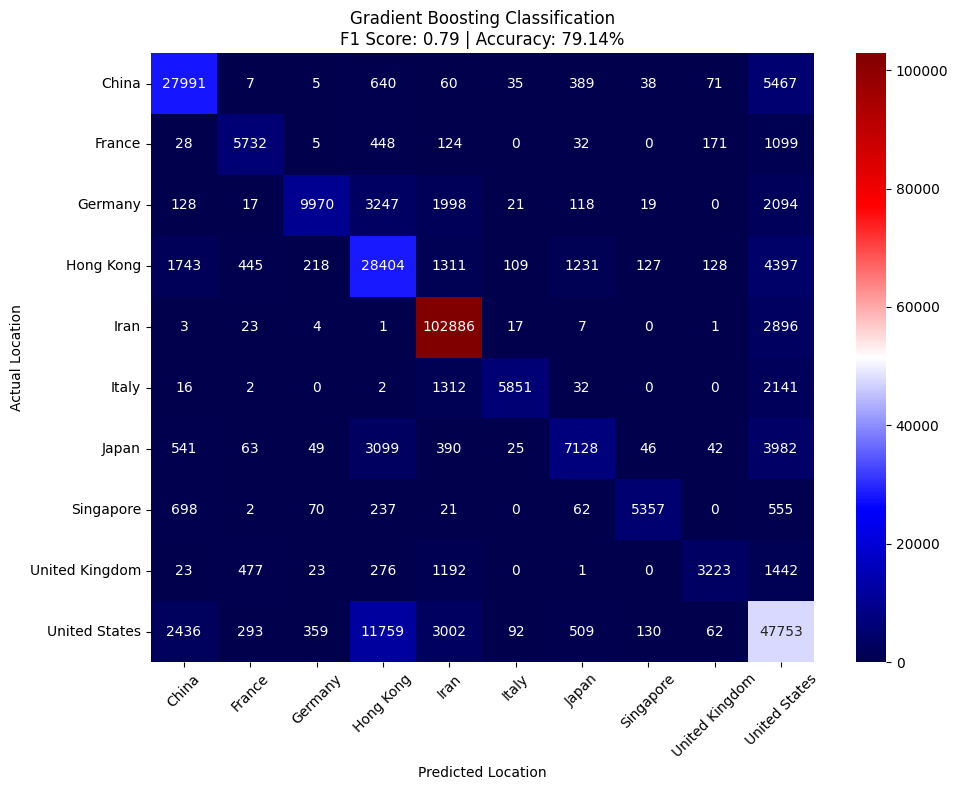

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Build confusion matrix using actual country labels (from y_test and gb_y_pred)
# Sort and include all unique classes to make axes consistent
unique_labels = sorted(list(set(y_test) | set(gb_y_pred)))
gb_cm = confusion_matrix(y_test, gb_y_pred, labels=unique_labels)

# Step 2: Compute evaluation metrics
f1_gb = f1_score(y_test, gb_y_pred, average='weighted')
accuracy_percentgb = accuracy_score(y_test, gb_y_pred) * 100

# Step 3: Plot heatmap with location names on axes
plt.figure(figsize=(10, 8))
sns.heatmap(gb_cm, annot=True, fmt="d", cmap="seismic",
            xticklabels=unique_labels, yticklabels=unique_labels)

plt.title(f"Gradient Boosting Classification\nF1 Score: {f1_gb:.2f} | Accuracy: {accuracy_percentgb:.2f}%")
plt.xlabel("Predicted Location")
plt.ylabel("Actual Location")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, gb_y_pred))


                precision    recall  f1-score   support

         China       0.83      0.81      0.82     34703
        France       0.81      0.75      0.78      7639
       Germany       0.93      0.57      0.70     17612
     Hong Kong       0.59      0.75      0.66     38113
          Iran       0.92      0.97      0.94    105838
         Italy       0.95      0.63      0.75      9356
         Japan       0.75      0.46      0.57     15365
     Singapore       0.94      0.77      0.84      7002
United Kingdom       0.87      0.48      0.62      6657
 United States       0.66      0.72      0.69     66395

      accuracy                           0.79    308680
     macro avg       0.83      0.69      0.74    308680
  weighted avg       0.80      0.79      0.79    308680



---

# XGBClassifier

In [41]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
from scipy.stats import uniform, randint

# Encode y values (locations)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Define model
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    use_label_encoder=False,
    eval_metric='mlogloss',
    tree_method='hist',
    random_state=42
)

# Define hyperparameter search space
param_dist = {
    'n_estimators': randint(50, 150),
    'learning_rate': uniform(0.03, 0.2),
    'max_depth': randint(3, 7),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.6, 0.4)
}

# Randomized SearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=25,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the model with best hyperparameters 
random_search.fit(X_train, y_train_encoded)

# Predict
y_pred_encoded = random_search.best_estimator_.predict(X_test)

# Decode predictions back to original labels
y_pred = le.inverse_transform(y_pred_encoded)

# Evaluate
print("Best Accuracy:", accuracy_score(y_test, y_pred))
print("Weighted F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 25 candidates, totalling 75 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:49:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:49:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:49:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:49:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=0.8404460046972835, learning_rate=0.1716145155592091, max_depth=4, n_estimators=102, subsample=0.9909729556485982; total time= 1.8min
[CV] END colsample_bytree=0.8404460046972835, learning_rate=0.1716145155592091, max_depth=4, n_estimators=102, subsample=0.9909729556485982; total time= 1.8min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:51:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:51:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.749816047538945, learning_rate=0.22014286128198324, max_depth=5, n_estimators=121, subsample=0.8795975452591109; total time= 2.3min
[CV] END colsample_bytree=0.749816047538945, learning_rate=0.22014286128198324, max_depth=5, n_estimators=121, subsample=0.8795975452591109; total time= 2.3min
[CV] END colsample_bytree=0.749816047538945, learning_rate=0.22014286128198324, max_depth=5, n_estimators=121, subsample=0.8795975452591109; total time= 2.3min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:52:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:52:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:52:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6624074561769746, learning_rate=0.06119890406724053, max_depth=5, n_estimators=124, subsample=0.9598528437324805; total time= 2.6min
[CV] END colsample_bytree=0.6624074561769746, learning_rate=0.06119890406724053, max_depth=5, n_estimators=124, subsample=0.9598528437324805; total time= 2.6min
[CV] END colsample_bytree=0.6624074561769746, learning_rate=0.06119890406724053, max_depth=5, n_estimators=124, subsample=0.9598528437324805; total time= 2.6min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:52:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:52:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:52:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8404460046972835, learning_rate=0.1716145155592091, max_depth=4, n_estimators=102, subsample=0.9909729556485982; total time= 1.9min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:53:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9329770563201687, learning_rate=0.07246782213565522, max_depth=6, n_estimators=109, subsample=0.7550213529560301; total time= 3.3min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:54:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9329770563201687, learning_rate=0.07246782213565522, max_depth=6, n_estimators=109, subsample=0.7550213529560301; total time= 3.4min
[CV] END colsample_bytree=0.9329770563201687, learning_rate=0.07246782213565522, max_depth=6, n_estimators=109, subsample=0.7550213529560301; total time= 3.4min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:55:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:55:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8447411578889518, learning_rate=0.057898772130408366, max_depth=6, n_estimators=109, subsample=0.8099085529881075; total time= 3.5min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:55:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7216968971838151, learning_rate=0.13495128632644757, max_depth=6, n_estimators=138, subsample=0.7873687420594125; total time= 3.9min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:56:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7216968971838151, learning_rate=0.13495128632644757, max_depth=6, n_estimators=138, subsample=0.7873687420594125; total time= 3.9min
[CV] END colsample_bytree=0.7216968971838151, learning_rate=0.13495128632644757, max_depth=6, n_estimators=138, subsample=0.7873687420594125; total time= 3.9min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:56:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:56:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8447411578889518, learning_rate=0.057898772130408366, max_depth=6, n_estimators=109, subsample=0.8099085529881075; total time= 3.5min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:57:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.786705157299192, learning_rate=0.20198808134726412, max_depth=5, n_estimators=70, subsample=0.8351497755908628; total time= 1.7min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:57:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7824279936868144, learning_rate=0.18703519227860274, max_depth=5, n_estimators=104, subsample=0.9949692657420364; total time= 2.4min
[CV] END colsample_bytree=0.7824279936868144, learning_rate=0.18703519227860274, max_depth=5, n_estimators=104, subsample=0.9949692657420364; total time= 2.4min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:57:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:57:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8447411578889518, learning_rate=0.057898772130408366, max_depth=6, n_estimators=109, subsample=0.8099085529881075; total time= 3.2min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:58:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.786705157299192, learning_rate=0.20198808134726412, max_depth=5, n_estimators=70, subsample=0.8351497755908628; total time= 1.7min
[CV] END colsample_bytree=0.786705157299192, learning_rate=0.20198808134726412, max_depth=5, n_estimators=70, subsample=0.8351497755908628; total time= 1.7min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:58:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:58:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6053059844639466, learning_rate=0.21844035113697055, max_depth=4, n_estimators=58, subsample=0.7047898756660642; total time= 1.3min
[CV] END colsample_bytree=0.7824279936868144, learning_rate=0.18703519227860274, max_depth=5, n_estimators=104, subsample=0.9949692657420364; total time= 2.4min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:58:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:58:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6053059844639466, learning_rate=0.21844035113697055, max_depth=4, n_estimators=58, subsample=0.7047898756660642; total time= 1.3min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:59:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6053059844639466, learning_rate=0.21844035113697055, max_depth=4, n_estimators=58, subsample=0.7047898756660642; total time= 1.3min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:59:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9332779646944658, learning_rate=0.06467293070155442, max_depth=3, n_estimators=85, subsample=0.7546708263364187; total time= 1.8min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:59:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9332779646944658, learning_rate=0.06467293070155442, max_depth=3, n_estimators=85, subsample=0.7546708263364187; total time= 1.8min
[CV] END colsample_bytree=0.9332779646944658, learning_rate=0.06467293070155442, max_depth=3, n_estimators=85, subsample=0.7546708263364187; total time= 1.8min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:00:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:00:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.902144564127061, learning_rate=0.11503117489824895, max_depth=4, n_estimators=53, subsample=0.7554563366576581; total time= 1.3min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:00:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.902144564127061, learning_rate=0.11503117489824895, max_depth=4, n_estimators=53, subsample=0.7554563366576581; total time= 1.3min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:00:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.902144564127061, learning_rate=0.11503117489824895, max_depth=4, n_estimators=53, subsample=0.7554563366576581; total time= 1.3min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:01:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6923575302488596, learning_rate=0.07820509320520234, max_depth=6, n_estimators=120, subsample=0.8829989973347863; total time= 3.4min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:01:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6923575302488596, learning_rate=0.07820509320520234, max_depth=6, n_estimators=120, subsample=0.8829989973347863; total time= 3.4min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:01:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6923575302488596, learning_rate=0.07820509320520234, max_depth=6, n_estimators=120, subsample=0.8829989973347863; total time= 3.4min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:01:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9878338511058234, learning_rate=0.18502656467222292, max_depth=4, n_estimators=123, subsample=0.9684482051282945; total time= 2.6min
[CV] END colsample_bytree=0.9878338511058234, learning_rate=0.18502656467222292, max_depth=4, n_estimators=123, subsample=0.9684482051282945; total time= 2.6min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:02:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:02:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9878338511058234, learning_rate=0.18502656467222292, max_depth=4, n_estimators=123, subsample=0.9684482051282945; total time= 2.6min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:02:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8391599915244341, learning_rate=0.21437484700462336, max_depth=6, n_estimators=127, subsample=0.7587948587257435; total time= 3.3min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:03:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8391599915244341, learning_rate=0.21437484700462336, max_depth=6, n_estimators=127, subsample=0.7587948587257435; total time= 3.3min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:04:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8391599915244341, learning_rate=0.21437484700462336, max_depth=6, n_estimators=127, subsample=0.7587948587257435; total time= 3.3min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:04:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6180909155642152, learning_rate=0.09506606615265287, max_depth=6, n_estimators=131, subsample=0.8619076397167239; total time= 3.6min
[CV] END colsample_bytree=0.8347004662655393, learning_rate=0.2230510614528276, max_depth=6, n_estimators=90, subsample=0.7888820517112247; total time= 2.3min
[CV] END colsample_bytree=0.6180909155642152, learning_rate=0.09506606615265287, max_depth=6, n_estimators=131, subsample=0.8619076397167239; total time= 3.5min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:04:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:04:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:05:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8347004662655393, learning_rate=0.2230510614528276, max_depth=6, n_estimators=90, subsample=0.7888820517112247; total time= 2.3min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:05:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8347004662655393, learning_rate=0.2230510614528276, max_depth=6, n_estimators=90, subsample=0.7888820517112247; total time= 2.2min
[CV] END colsample_bytree=0.6180909155642152, learning_rate=0.09506606615265287, max_depth=6, n_estimators=131, subsample=0.8619076397167239; total time= 3.5min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:06:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:06:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6661067756252009, learning_rate=0.033127281348238787, max_depth=3, n_estimators=137, subsample=0.8184644554526709; total time= 2.6min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:07:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6661067756252009, learning_rate=0.033127281348238787, max_depth=3, n_estimators=137, subsample=0.8184644554526709; total time= 2.6min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:07:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6661067756252009, learning_rate=0.033127281348238787, max_depth=3, n_estimators=137, subsample=0.8184644554526709; total time= 2.6min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:07:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9160702162124823, learning_rate=0.15119199495620228, max_depth=4, n_estimators=90, subsample=0.9744879026631341; total time= 1.9min
[CV] END colsample_bytree=0.9160702162124823, learning_rate=0.15119199495620228, max_depth=4, n_estimators=90, subsample=0.9744879026631341; total time= 1.9min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:07:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:07:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7173952698872152, learning_rate=0.03281596454301689, max_depth=5, n_estimators=130, subsample=0.9134025858245949; total time= 3.2min
[CV] END colsample_bytree=0.7173952698872152, learning_rate=0.03281596454301689, max_depth=5, n_estimators=130, subsample=0.9134025858245949; total time= 3.2min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:08:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:08:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7173952698872152, learning_rate=0.03281596454301689, max_depth=5, n_estimators=130, subsample=0.9134025858245949; total time= 3.2min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:08:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9160702162124823, learning_rate=0.15119199495620228, max_depth=4, n_estimators=90, subsample=0.9744879026631341; total time= 1.9min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:08:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9400154311159197, learning_rate=0.11989013482764069, max_depth=3, n_estimators=97, subsample=0.8112454756594799; total time= 1.8min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:08:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9400154311159197, learning_rate=0.11989013482764069, max_depth=3, n_estimators=97, subsample=0.8112454756594799; total time=17.8min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:25:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7888859700647797, learning_rate=0.053918849187660337, max_depth=4, n_estimators=52, subsample=0.9282355145850691; total time=17.1min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:25:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9400154311159197, learning_rate=0.11989013482764069, max_depth=3, n_estimators=97, subsample=0.8112454756594799; total time=17.7min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:25:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7888859700647797, learning_rate=0.053918849187660337, max_depth=4, n_estimators=52, subsample=0.9282355145850691; total time=33.0min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:41:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7888859700647797, learning_rate=0.053918849187660337, max_depth=4, n_estimators=52, subsample=0.9282355145850691; total time=33.0min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:41:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8245108790277985, learning_rate=0.1841934359909122, max_depth=5, n_estimators=76, subsample=0.8568198488145982; total time=33.3min
[CV] END colsample_bytree=0.8675365010654429, learning_rate=0.16318447132349934, max_depth=6, n_estimators=135, subsample=0.9661638227728979; total time=50.7min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:58:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:58:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8245108790277985, learning_rate=0.1841934359909122, max_depth=5, n_estimators=76, subsample=0.8568198488145982; total time=33.3min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:58:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8245108790277985, learning_rate=0.1841934359909122, max_depth=5, n_estimators=76, subsample=0.8568198488145982; total time=33.2min
[CV] END colsample_bytree=0.8675365010654429, learning_rate=0.16318447132349934, max_depth=6, n_estimators=135, subsample=0.9661638227728979; total time=50.7min
[CV] END colsample_bytree=0.8675365010654429, learning_rate=0.16318447132349934, max_depth=6, n_estimators=135, subsample=0.9661638227728979; total time=50.7min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:58:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7710164073434198, learning_rate=0.035083825348819035, max_depth=3, n_estimators=100, subsample=0.7094287557060203; total time=33.4min
[CV] END colsample_bytree=0.7710164073434198, learning_rate=0.035083825348819035, max_depth=3, n_estimators=100, subsample=0.7094287557060203; total time=33.4min
[CV] END colsample_bytree=0.8545641645055122, learning_rate=0.09287119621526534, max_depth=6, n_estimators=53, subsample=0.9722699421778278; total time=16.9min
[CV] END colsample_bytree=0.8545641645055122, learning_rate=0.09287119621526534, max_depth=6, n_estimators=53, subsample=0.9722699421778278; total time=16.9min
[CV] END colsample_bytree=0.8545641645055122, learning_rate=0.09287119621526534, max_depth=6, n_estimators=53, subsample=0.9722699421778278; total time=16.8min
[CV] END colsample_bytree=0.7710164073434198, learning_rate=0.035083825348819035, max_depth=3, n_estimators=100, subsample=0.7094287557060203; total time=17.1min


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [22:15:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Accuracy: 0.7880555915511209
Weighted F1 Score: 0.7848404884191095

Classification Report:
                 precision    recall  f1-score   support

         China       0.89      0.83      0.86     34703
        France       0.78      0.70      0.74      7639
       Germany       0.77      0.61      0.68     17612
     Hong Kong       0.62      0.70      0.66     38113
          Iran       0.91      0.97      0.94    105838
         Italy       0.92      0.57      0.70      9356
         Japan       0.61      0.50      0.55     15365
     Singapore       0.85      0.76      0.80      7002
United Kingdom       0.69      0.40      0.51      6657
 United States       0.67      0.72      0.69     66395

      accuracy                           0.79    308680
     macro avg       0.77      0.68      0.71    308680
  weighted avg       0.79      0.79      0.78    308680



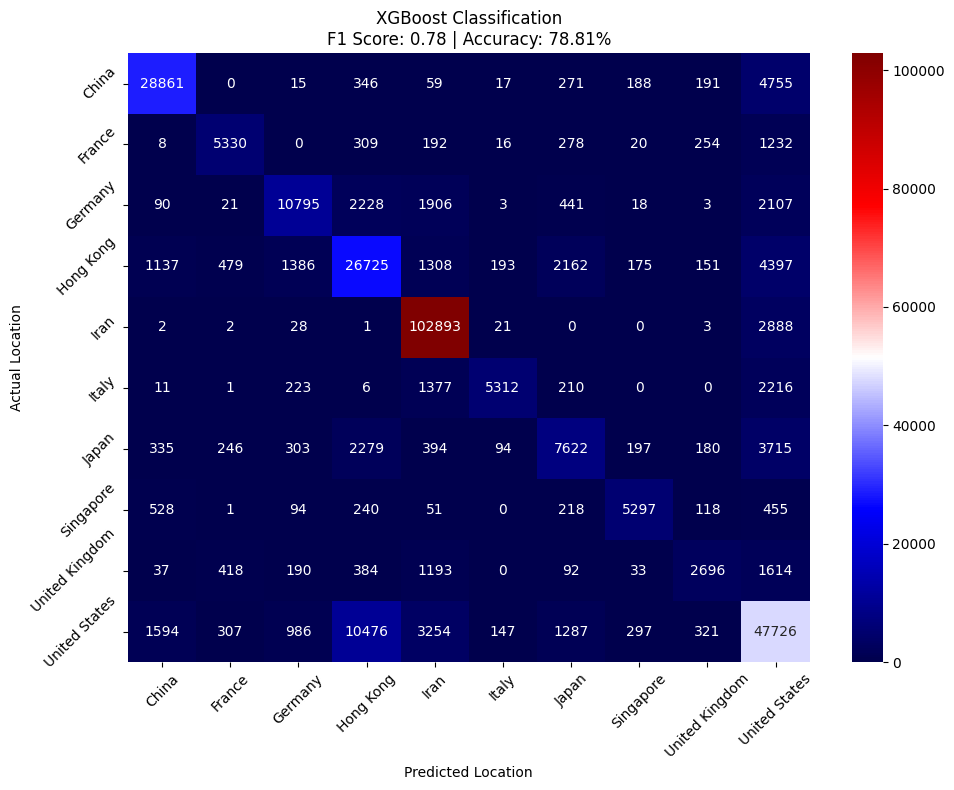

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix (using decoded predictions)
xgb_cm = confusion_matrix(y_test, y_pred)

# F1 and accuracy
f1_xgb = f1_score(y_test, y_pred, average='weighted')
accuracy_percent_xgb = accuracy_score(y_test, y_pred) * 100

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(xgb_cm, annot=True, fmt="d", cmap="seismic",
            xticklabels=le.classes_, yticklabels=le.classes_)

plt.title(f"XGBoost Classification\nF1 Score: {f1_xgb:.2f} | Accuracy: {accuracy_percent_xgb:.2f}%")
plt.xlabel('Predicted Location')
plt.ylabel('Actual Location')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


In [51]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get classification report as dict
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame and remove unwanted rows
report_df = pd.DataFrame(report_dict).T.drop(['accuracy', 'macro avg', 'weighted avg'])

# Reset index so 'country' becomes a column
report_df.reset_index(inplace=True)
report_df.rename(columns={'index': 'Country'}, inplace=True)

report_df_sorted = report_df.sort_values(by='support', ascending=False)

report_df_sorted


,Country,precision,recall,f1-score,support
4,Iran,0.913573,0.972174,0.941963,105838.0
9,United States,0.671205,0.718819,0.694196,66395.0
3,Hong Kong,0.621598,0.701204,0.659006,38113.0
0,China,0.885225,0.831657,0.857606,34703.0
2,Germany,0.769971,0.612934,0.682537,17612.0
6,Japan,0.605834,0.496062,0.545481,15365.0
5,Italy,0.915389,0.567764,0.700838,9356.0
1,France,0.783248,0.697735,0.738023,7639.0
7,Singapore,0.850924,0.756498,0.800937,7002.0
8,United Kingdom,0.688282,0.404987,0.509930,6657.0


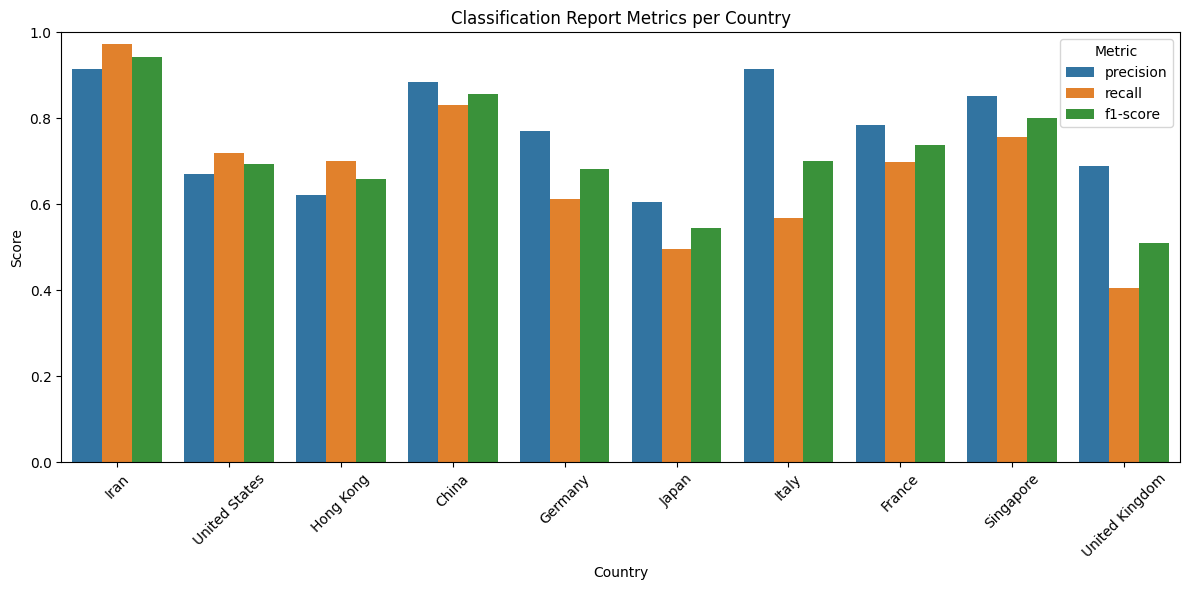

In [52]:
# Melt DataFrame for seaborn (long format)
melted_df = report_df_sorted.melt(id_vars='Country', value_vars=['precision', 'recall', 'f1-score'],
                           var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Country', y='Score', hue='Metric')
plt.title("Classification Report Metrics per Country")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()
